# Paid Apps Analysis by Danielle Ajoc

# Introduction

This analysis aims to answer the following questions  
1) What are the top 10 paid apps?  
2) Which categories of paid apps had the most number of installs?  
3) Which price ranges of the paid apps had the most number of installs?   
4) Which content rating for paid apps had the most number of installs?  
5) Do paid apps still have in app purchases?  
6) Do paid apps still have advertisements?  
7) Do paid apps have higher rating?

# Data Cleaning and Selection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
apps_df = pd.read_csv("apps_cleaned.csv")
apps_df.head()

,Unnamed: 0,name,id,category,rating,ratingCount,installs,free,price,size,contentRating,hasAds,hasAppPurchase,isEditorsChoice
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,15,True,0.0,10M,Everyone,False,False,False
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,7662,True,0.0,2.9M,Everyone,True,False,False
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,58,True,0.0,3.7M,Everyone,False,False,False
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,19,True,0.0,1.8M,Everyone,True,False,False
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,478,True,0.0,6.2M,Everyone,False,False,False


In [3]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312942 entries, 0 to 2312941
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   name             object 
 2   id               object 
 3   category         object 
 4   rating           float64
 5   ratingCount      float64
 6   installs         int64  
 7   free             bool   
 8   price            float64
 9   size             object 
 10  contentRating    object 
 11  hasAds           bool   
 12  hasAppPurchase   bool   
 13  isEditorsChoice  bool   
dtypes: bool(4), float64(3), int64(2), object(5)
memory usage: 185.3+ MB


In [4]:
paid_df = apps_df[apps_df.free==False]
paid_df.head(5)

,Unnamed: 0,name,id,category,rating,ratingCount,installs,free,price,size,contentRating,hasAds,hasAppPurchase,isEditorsChoice
273,273,Limitless Paint,com.bytescaffold.limitlesspaint,Tools,4.5,236.0,34125,False,1.99,1.6M,Everyone,False,False,False
296,296,Standalone Golf GPS by Hole19,com.hole19golf.wear,Sports,2.8,160.0,10407,False,4.99,30M,Everyone,False,False,False
417,417,Calculator + Widget 21 themes,makatea.pro.calculator.widget,Tools,3.5,468.0,12019,False,0.99,886k,Everyone,False,False,False
554,554,莎士比亞11連環錯（英漢對照）,tw.com.mebook.generic4719180217042,Education,0.0,0.0,2,False,2.99,17M,Everyone,False,False,False
618,618,Theme Park Simulator,com.bestridesimulators.theme.park.simulator.game,Simulation,3.8,1158.0,23644,False,0.99,36M,Everyone,True,True,False


# Top 10 Most Installed Paid Apps

In [5]:
mostInstalled_df=paid_df.sort_values(by="installs",ascending=False).head(15)

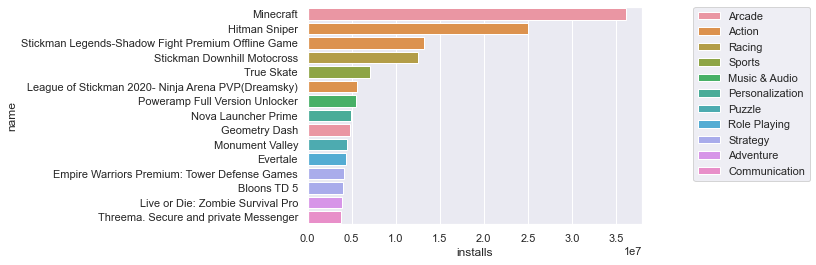

In [6]:
#learned to use dodge for plots that used hue because the bars get smaller if you alse use hue
#learned how to position the legend
sns.barplot(data=mostInstalled_df,x="installs",y="name", hue="category", orient="h",dodge=False)
plt.legend( bbox_to_anchor=(1.5,1),loc='upper right', borderaxespad=0)

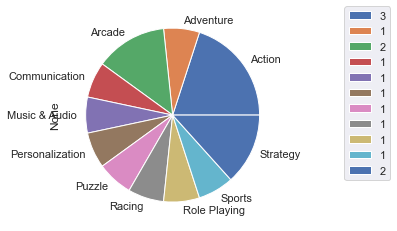

In [7]:
#Composition of categories for paid apps with most number of installs
mostInstalled_df.groupby("category").size().plot.pie(legend=True)
mostInstalled_pie_labels=mostInstalled_df.groupby("category").size()
plt.legend( bbox_to_anchor=(1.5,1),loc='upper right', borderaxespad=0,labels=mostInstalled_pie_labels)

The top 15 most downloaded apps are mostly mobile games with Minecraft having the most number of installs. Paid game apps with the most installs were from categories which are adventure, action, strategy, sports, role playing, racing, puzzle, and arcade. There was also a communication app named Threema that reached the 15th place for most installed paid app. There was also a music and audio app named Poweramp Full Version Unlocker and personalization app named Nova Launcher Prime that made it to the top 15. 

# Installs for Paid Apps by Category

## Released Paid Apps Per Category

<AxesSubplot:ylabel='category'>

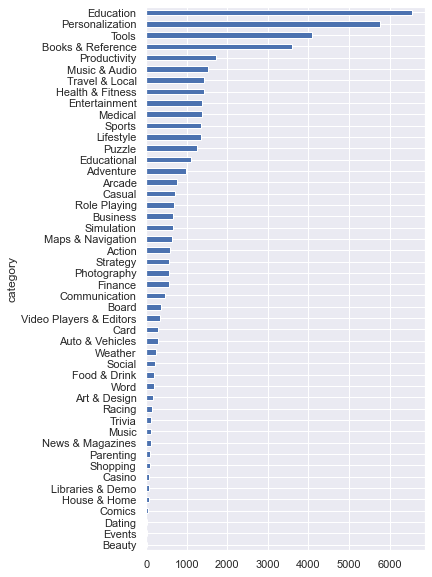

In [8]:
categoryRelease_group =paid_df.groupby("category").size().sort_values(ascending=True)
categoryRelease_group.plot.barh(figsize=(5,10))

<AxesSubplot:ylabel='None'>

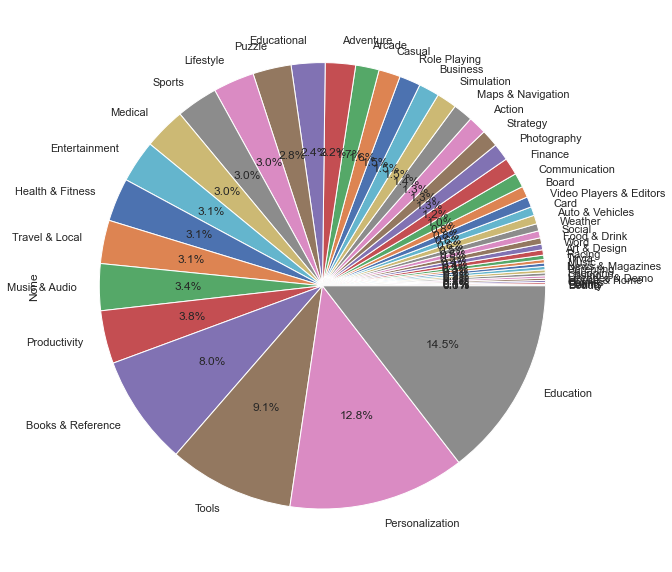

In [9]:
categoryRelease_group.plot.pie(figsize=(10,20),autopct='%1.1f%%')

The top 5 categories with the most paid apps are education, personalization, tools, books and reference, and productivity. The total number of paid apps in the top 6 categories, with music and audio being the 6th category with most number of paid apps released, combine to make up about more than 50 percent of the total paid apps released.

## Number of Installs Per Category

<AxesSubplot:ylabel='category'>

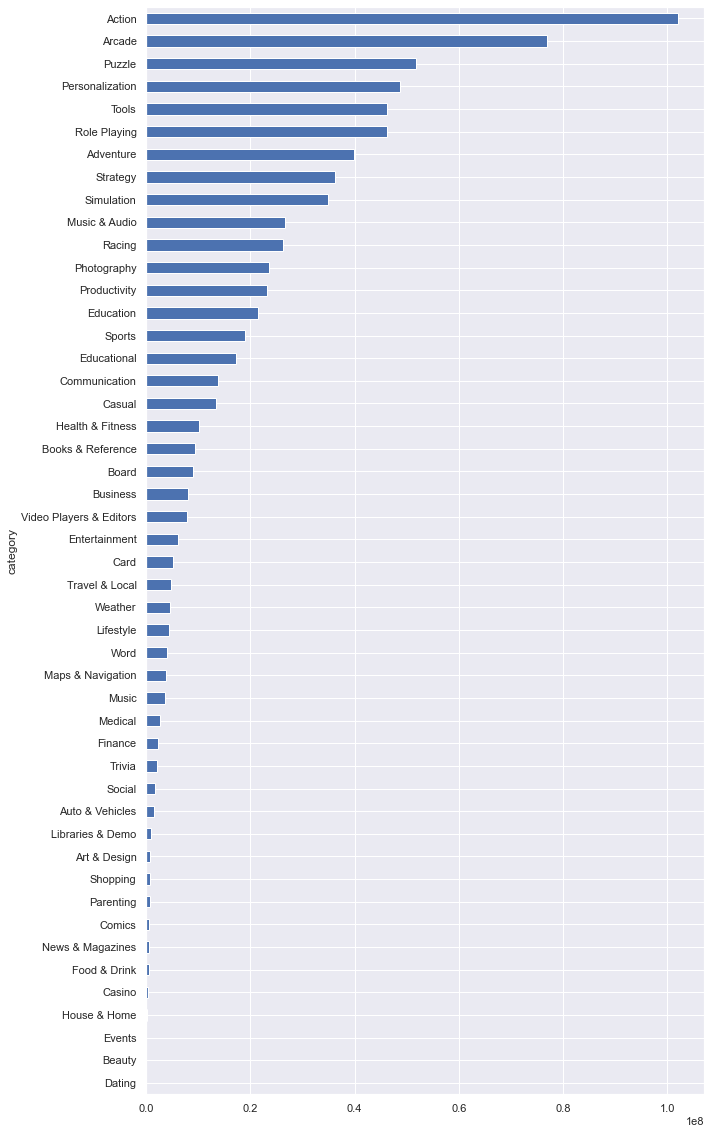

In [10]:
categoryInstall_group =paid_df.groupby("category").installs.sum().sort_values(ascending=True)
categoryInstall_group.plot.barh(figsize=(10,20))

<AxesSubplot:ylabel='installs'>

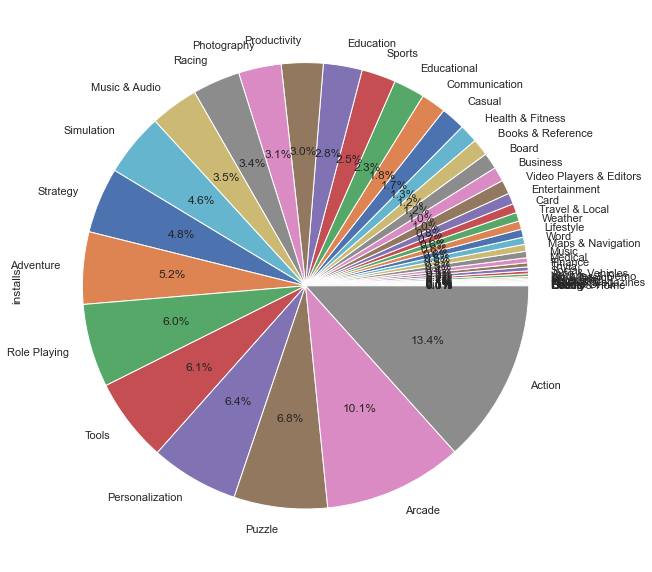

In [11]:
categoryInstall_group.plot.pie(figsize=(10,20), autopct='%1.1f%%')

The top 5 categories with the most number of installs for paid apps are Action, Arcade, Puzzle, Personalization, and Tools. The top 7 categories, with Role Playing with the 6th highest number of installs and Adventure with the 7th number of highest installs, when combined make up more than 50 percent of the total number of installs for paid apps.

Text(0.5, 1.0, 'Total Number of Installs')

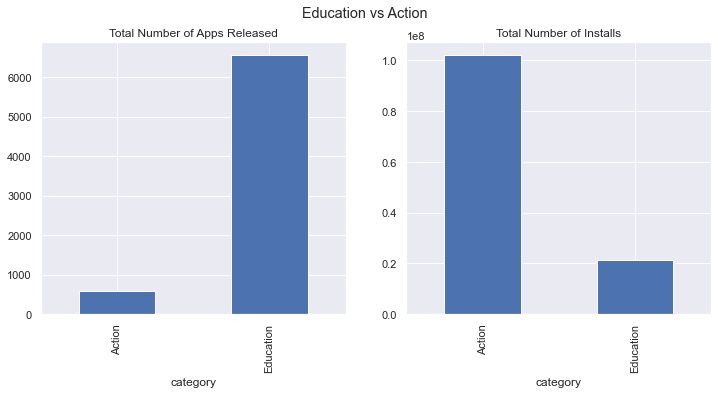

In [12]:
fig, ax = plt.subplots(ncols=2,figsize=(12,5))
fig.suptitle("Education vs Action")

educationVsAction = paid_df[paid_df.category.isin(["Education","Action"])]


educationVsAction.groupby("category").size().plot.bar(ax=ax[0])
ax[0].set_title("Total Number of Apps Released")

educationVsAction.groupby("category").installs.sum().plot.bar(ax=ax[1])
ax[1].set_title("Total Number of Installs")


Although education had the most number of apps released, action had the highest number of installs. 14.5 percent of paid apps released were education apps but the number of installs for the category was 2.8 percent. Only 1.3 percent of paid apps are Action apps but they were able to capture 13.4 percent of total installs.

Text(0.5, 0.98, 'Most number of Installs')

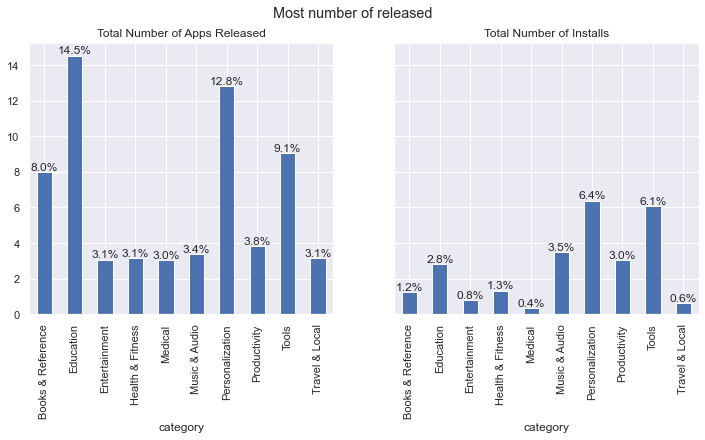

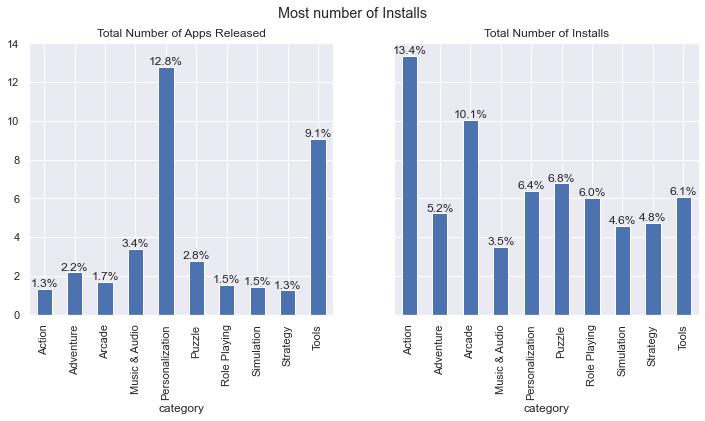

In [13]:
categoryWithMostRelease=paid_df.groupby("category").size().sort_values(ascending=False).head(10).index
categoryWithMostInstalls=paid_df.groupby("category").installs.sum().sort_values(ascending=False).head(10).index

categoryWithMostRelease_df=paid_df[paid_df.category.isin(categoryWithMostRelease)]
categoryWithMostInstalls_df=paid_df[paid_df.category.isin(categoryWithMostInstalls)]

fig, ax = plt.subplots(ncols=2, figsize=(12,5),sharey=True)
fig1, ax1 = plt.subplots(ncols=2, figsize=(12,5),sharey=True)


categoryWithMostRelease_df.groupby("category").size().apply(lambda x: x/paid_df.shape[0]*100).plot.bar(ax=ax[0])
ax[0].set_title("Total Number of Apps Released")
categoryWithMostRelease_df.groupby("category").installs.sum().apply(lambda x: x/paid_df.installs.sum()*100).plot.bar(ax=ax[1])
ax[1].set_title("Total Number of Installs")

ax[0].bar_label(ax[0].containers[0],fmt='%1.1f%%', label_type='edge')
ax[1].bar_label(ax[1].containers[0],fmt='%1.1f%%', label_type='edge')

fig.suptitle("Most number of released")

categoryWithMostInstalls_df.groupby("category").size().apply(lambda x: x/paid_df.shape[0]*100).plot.bar(ax=ax1[0])
ax1[0].set_title("Total Number of Apps Released")
categoryWithMostInstalls_df.groupby("category").installs.sum().apply(lambda x: x/paid_df.installs.sum()*100).plot.bar(ax=ax1[1])
ax1[1].set_title("Total Number of Installs")

ax1[0].bar_label(ax1[0].containers[0],fmt='%1.1f%%', label_type='edge')
ax1[1].bar_label(ax1[1].containers[0],fmt='%1.1f%%', label_type='edge')

fig1.suptitle("Most number of Installs")


On a wider scale, the top 10 categories that made up 63.98 percent of total released apps only make up 26.14 percent of total paid apps installed. On the other hand, the top 10 categories that had the most installs compose only 37.48 percent of released apps but make up 66.71 percent of total paid apps installed.

# Price Distribution of Paid Apps

## Number of Releases Per Price Price

<AxesSubplot:ylabel='Frequency'>

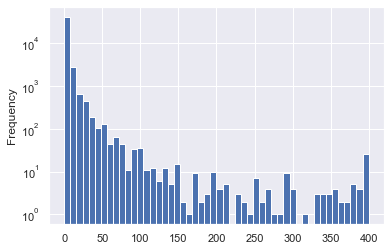

In [24]:
paid_df.price.plot.hist(log=True, bins=50)

Most of the paid apps released had a low price with the majority being from near to free to 150 dollars. 

## Number of Installs per Price

<AxesSubplot:xlabel='price', ylabel='installs'>

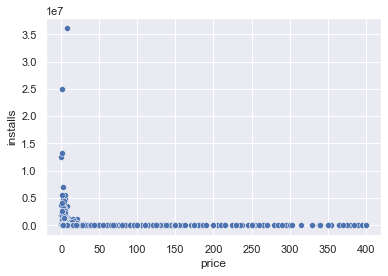

In [60]:
sns.scatterplot(data=paid_df, x="price", y="installs")

Apps with lower prices had the most installs while apps with higher prices had less installs.

# Installs for Paid Apps by Content Rating

## Apps Released by Content Rating

<AxesSubplot:ylabel='contentRating'>

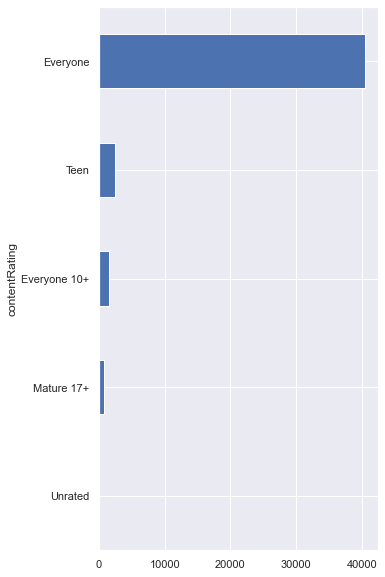

In [76]:
contentRelease_group =paid_df.groupby("contentRating").size()
contentRelease_group.sort_values(ascending=True).plot.barh(figsize=(5,10))

<AxesSubplot:ylabel='None'>

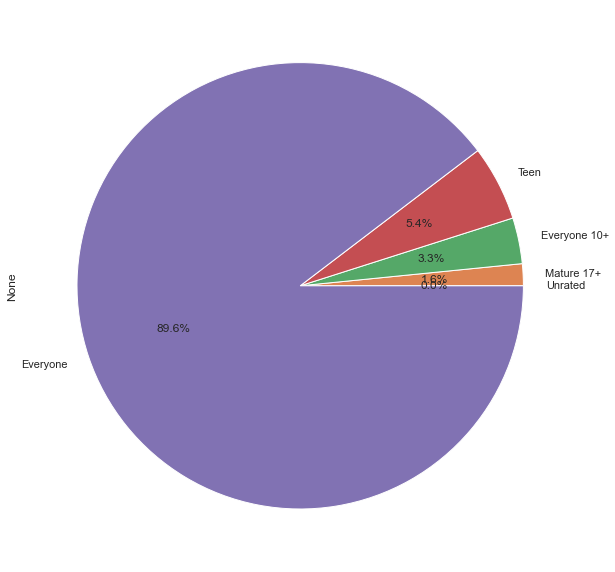

In [17]:
contentRelease_group.plot.pie(figsize=(10,20),autopct='%1.1f%%')

## Number of Installs per Content Rating

<AxesSubplot:ylabel='contentRating'>

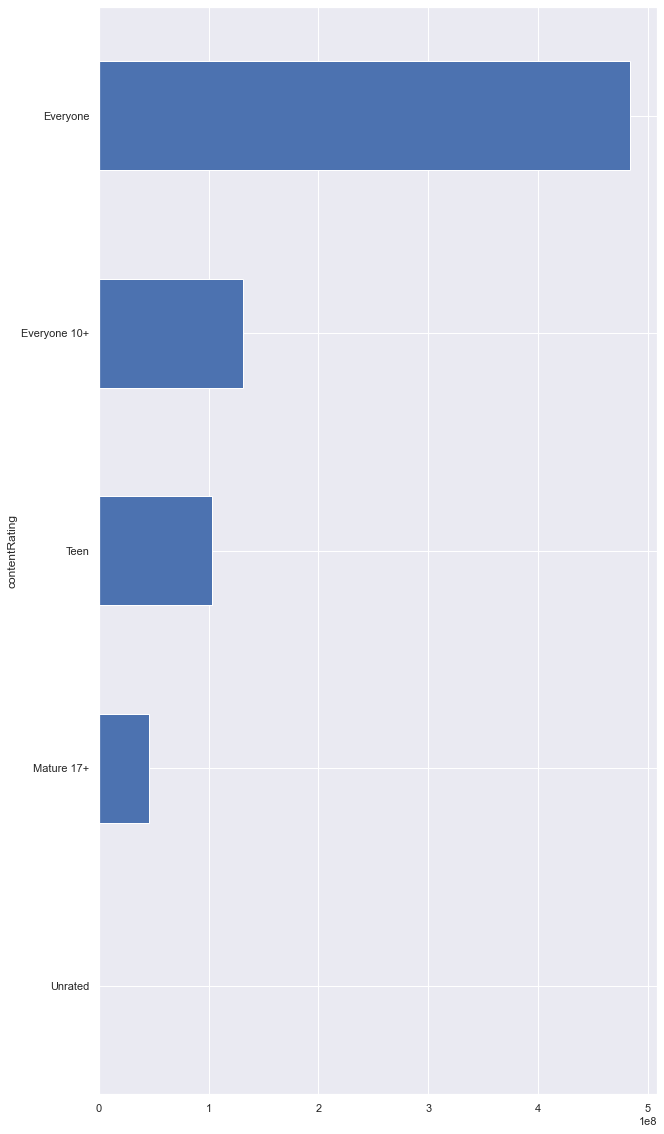

In [62]:
contentInstall_group =paid_df.groupby("contentRating").installs.sum().sort_values(ascending=True)
contentInstall_group.plot.barh(figsize=(10,20))

<AxesSubplot:ylabel='installs'>

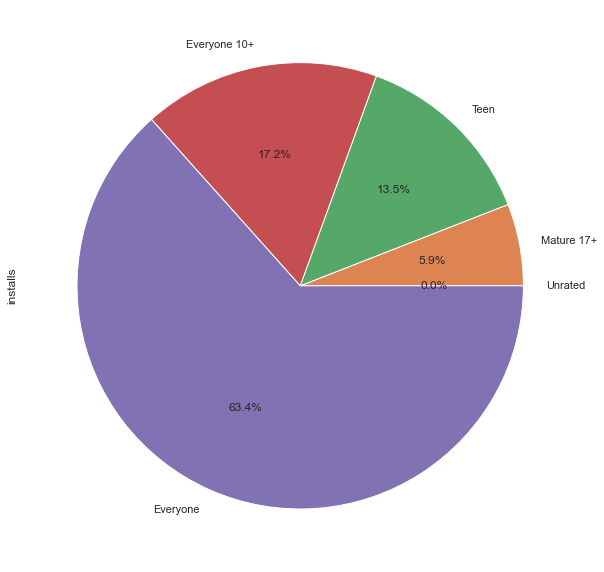

In [19]:
contentInstall_group.plot.pie(figsize=(10,20),autopct='%1.1f%%')

Text(0.5, 0.98, 'Percent of Released Apps and Apps Installed By Content Rating')

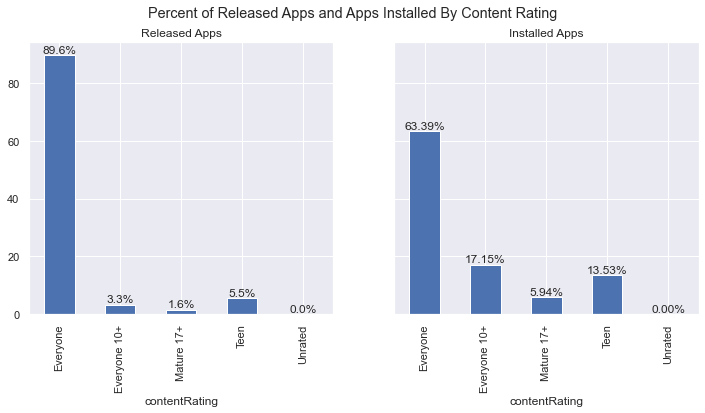

In [89]:
fig,ax = plt.subplots(ncols=2, figsize=(12,5), sharey=True, sharex=True)


contentRelease_group.apply(lambda x: round(x/paid_df.shape[0],4)*100).plot.bar(ax=ax[0])
paid_df.groupby("contentRating").installs.apply(lambda x: round(x.sum()/paid_df.installs.sum(),4)*100).plot.bar(ax=ax[1])

ax[0].bar_label(ax[0].containers[0],fmt='%1.1f%%', label_type='edge')
ax[1].bar_label(ax[1].containers[0],fmt='%1.2f%%', label_type='edge')

ax[0].set_title("Released Apps")
ax[1].set_title("Installed Apps")
fig.suptitle("Percent of Released Apps and Apps Installed By Content Rating")

Although only 3.3 percent of paid apps released are for everyone 10+, it comprises 17.15 percent of apps installed. Mature 17+ apps compose only 1.6 percent of released apps but it is 5.94 percent of the apps installed. Lastly, Teen apps are only 5.5 percent of apps released but it is 13.53 percent of the apps installed.

# App Purchases in Paid Apps

<AxesSubplot:ylabel='hasAppPurchase'>

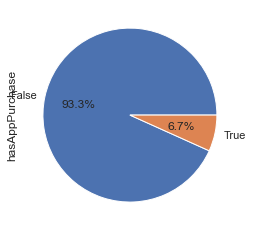

In [91]:
paid_df.hasAppPurchase.value_counts().plot.pie(autopct='%1.1f%%')


Majority of paid apps do not have app purchases.

# Ads in Paid Apps

<AxesSubplot:ylabel='hasAds'>

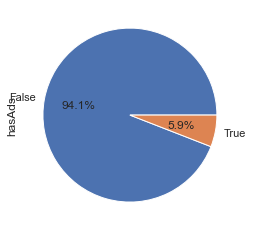

In [92]:
paid_df.hasAds.value_counts().plot.pie(autopct='%1.1f%%')

Majority of paid apps do not have ads.

# Rating of Paid Apps

<AxesSubplot:ylabel='Frequency'>

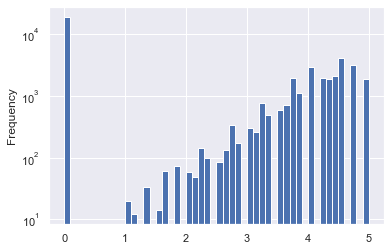

In [22]:
paid_df.rating.plot.hist(bins=50,log=True)